In [65]:
import pandas as pd

In [66]:
df = pd.read_csv('trimmed_dataset.csv')

In [67]:
df.head()

abstract  \
0    Context. Swift data are revolutionising our ...   
1    The star HE 1305-0007 is a metal-poor double...   
2    The search for MSSM Higgs bosons will be an ...   
3    The blazar PKS0537-441 has been observed by ...   
4    Precise measurements of the single spin asym...   

                                             authors  \
0  P.A. Evans (1), A.P. Beardmore (1), K.L. Page ...   
1  Wen-Yuan Cui (1,2,3), D. N. Cui (1), Y. S. Du ...   
2  S. Gennai, S. Heinemeyer, A. Kalinowski, R. Ki...   
3  E. Pian (1), P. Romano (2,3), A. Treves (4), G...   
4  H. Okada, I. Alekseev, A. Bravar, G. Bunce, S....   

                                      authors_parsed categories  \
0  [["Evans", "P. A.", ""], ["Beardmore", "A. P."...   astro-ph   
1  [["Cui", "Wen-Yuan", ""], ["Cui", "D. N.", ""]...   astro-ph   
2  [["Gennai", "S.", ""], ["Heinemeyer", "S.", ""...     hep-ph   
3  [["Pian", "E.", ""], ["Romano", "P.", ""], ["T...   astro-ph   
4  [["Okada", "H.", ""], ["Alekseev", "I.", ""], ...     hep-ex   

                                            comments  \
0  8 pages, 6 figures, Accepted for publication i...   
1  4 pages, 3 figures, paper accepted for publica...   
2                                24 pages, 8 figures   
3  24 pages, 7 figures, 3 tables, in press in the...   
4                                            4 pages   

                              doi        id                       journal-ref  \
0      10.1051/0004-6361:20077530  704.0128                               NaN   
1      10.1088/0256-307X/24/5/081  704.0576  Chin.Phys.Lett.24:1417-1421,2007   
2  10.1140/epjc/s10052-007-0398-0  704.0619       Eur.Phys.J.C52:383-395,2007   
3                  10.1086/518469  704.0958      Astrophys.J.664:106-116,2007   
4               10.1063/1.2750871  704.1031    AIP Conf.Proc.915:681-684,2007   

  license               report-no         submitter  \
0     NaN                     NaN          Kim Page   
1     NaN                     NaN       Wenyuan Cui   
2     NaN  DCPT/07/12, IPPP/07/06   Sven Heinemeyer   
3     NaN                     NaN        Elena Pian   
4     NaN                     NaN  Hiromi Okada Dr.   

                                               title update_date  \
0  An online repository of Swift/XRT light curves...  2009-11-13   
1  Neutron-Capture Elements in the Double-Enhance...  2009-06-23   
2  Search for Heavy Neutral MSSM Higgs Bosons wit...  2008-11-26   
3  Simultaneous Swift and REM monitoring of the b...  2009-06-23   
4  Measurements of Single and Double Spin Asymmet...  2010-12-13   

                                            versions  \
0  [{"version": "v1", "created": "Mon, 2 Apr 2007...   
1  [{"version": "v1", "created": "Wed, 4 Apr 2007...   
2  [{"version": "v1", "created": "Wed, 4 Apr 2007...   
3  [{"version": "v1", "created": "Fri, 6 Apr 2007...   
4  [{"version": "v1", "created": "Sun, 8 Apr 2007...   

                                         author_list  
0  ['P. A. Evans', 'A. P. Beardmore', 'K. L. Page...  
1  ['Wen-Yuan Cui', 'D. N. Cui', 'Y. S. Du', 'B. ...  
2  ['S. Gennai', 'S. Heinemeyer', 'A. Kalinowski'...  
3  ['E. Pian', 'P. Romano', 'A. Treves', 'G. Ghis...  
4  ['H. Okada', 'I. Alekseev', 'A. Bravar', 'G. B...

# Community Detection Analysis

This notebook performs community detection on the co-authorship network to identify research clusters and groups of authors who collaborate frequently.

## Step 1: Import Required Libraries

In [68]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

## Step 2: Build Co-Authorship Network

In [69]:
# Create an undirected graph from the co-authorship data
G = nx.Graph()

# Add edges from the dataset (each paper connects all its authors)
for _, row in df.iterrows():
    # Parse the author_list column
    import ast
    try:
        if pd.notna(row['author_list']):
            authors = ast.literal_eval(row['author_list']) if isinstance(row['author_list'], str) else row['author_list']
            
            # Create edges between all pairs of co-authors
            for i in range(len(authors)):
                for j in range(i+1, len(authors)):
                    author1 = authors[i]
                    author2 = authors[j]
                    
                    # Add edge with weight (number of collaborations)
                    if G.has_edge(author1, author2):
                        G[author1][author2]['weight'] += 1
                    else:
                        G.add_edge(author1, author2, weight=1)
    except:
        continue

# Basic network statistics
print("Network Statistics:")
print(f"Number of nodes (authors): {G.number_of_nodes()}")
print(f"Number of edges (collaborations): {G.number_of_edges()}")
print(f"Network density: {nx.density(G):.4f}")
print(f"Is connected: {nx.is_connected(G)}")

# Check for connected components
num_components = nx.number_connected_components(G)
print(f"\nNumber of connected components: {num_components}")

if num_components > 1:
    components = list(nx.connected_components(G))
    component_sizes = [len(c) for c in components]
    print(f"Component sizes: {sorted(component_sizes, reverse=True)}")
    
    # Use largest connected component for community detection
    largest_cc = max(nx.connected_components(G), key=len)
    G_main = G.subgraph(largest_cc).copy()
    print(f"\nUsing largest connected component with {G_main.number_of_nodes()} nodes")
else:
    G_main = G

print(f"\nGraph for analysis:")
print(f"Nodes: {G_main.number_of_nodes()}")
print(f"Edges: {G_main.number_of_edges()}")

Network Statistics:
Number of nodes (authors): 2792
Number of edges (collaborations): 118563
Network density: 0.0304
Is connected: True

Number of connected components: 1

Graph for analysis:
Nodes: 2792
Edges: 118563


## Step 3: Apply Louvain Algorithm

The Louvain method is a greedy optimization method for extracting communities from large networks.

In [52]:
# Install python-louvain if not already installed
try:
    import community as community_louvain
except ImportError:
    print("Installing python-louvain...")
    import sys
    !{sys.executable} -m pip install python-louvain
    import community as community_louvain

# Apply Louvain algorithm
louvain_communities = community_louvain.best_partition(G_main, weight='weight')

# Calculate modularity
louvain_modularity = community_louvain.modularity(louvain_communities, G_main, weight='weight')

# Analyze communities
louvain_community_counts = Counter(louvain_communities.values())
num_louvain_communities = len(louvain_community_counts)

print("=" * 60)
print("LOUVAIN ALGORITHM RESULTS")
print("=" * 60)
print(f"Number of communities: {num_louvain_communities}")
print(f"Modularity: {louvain_modularity:.4f}")
print(f"\nCommunity size distribution:")
for comm_id, size in sorted(louvain_community_counts.items(), key=lambda x: x[1], reverse=True):
    print(f"  Community {comm_id}: {size} authors")

# Statistics
community_sizes = list(louvain_community_counts.values())
print(f"\nSize statistics:")
print(f"  Mean: {np.mean(community_sizes):.2f}")
print(f"  Median: {np.median(community_sizes):.2f}")
print(f"  Std: {np.std(community_sizes):.2f}")
print(f"  Min: {np.min(community_sizes)}")
print(f"  Max: {np.max(community_sizes)}")

LOUVAIN ALGORITHM RESULTS
Number of communities: 32
Modularity: 0.8492

Community size distribution:
  Community 0: 391 authors
  Community 5: 274 authors
  Community 6: 235 authors
  Community 2: 222 authors
  Community 1: 174 authors
  Community 11: 145 authors
  Community 7: 138 authors
  Community 24: 126 authors
  Community 9: 122 authors
  Community 14: 98 authors
  Community 31: 90 authors
  Community 16: 86 authors
  Community 10: 81 authors
  Community 20: 76 authors
  Community 13: 74 authors
  Community 12: 70 authors
  Community 21: 69 authors
  Community 18: 46 authors
  Community 25: 44 authors
  Community 15: 41 authors
  Community 19: 31 authors
  Community 29: 31 authors
  Community 8: 27 authors
  Community 23: 26 authors
  Community 4: 19 authors
  Community 17: 11 authors
  Community 26: 11 authors
  Community 27: 9 authors
  Community 22: 7 authors
  Community 3: 7 authors
  Community 30: 6 authors
  Community 28: 5 authors

Size statistics:
  Mean: 87.25
  Median:

## Step 4: Apply Leiden Algorithm

The Leiden algorithm is an improvement over Louvain, guaranteeing well-connected communities.

In [53]:
# Install required packages for Leiden
try:
    import leidenalg
    import igraph as ig
except ImportError:
    print("Installing leidenalg and igraph...")
    import sys
    !{sys.executable} -m pip install leidenalg python-igraph
    import leidenalg
    import igraph as ig

# Convert NetworkX graph to igraph format
# Create mapping of node names to indices
node_list = list(G_main.nodes())
node_to_idx = {node: idx for idx, node in enumerate(node_list)}

# Create edge list with indices
edges = [(node_to_idx[u], node_to_idx[v]) for u, v in G_main.edges()]
weights = [G_main[u][v]['weight'] for u, v in G_main.edges()]

# Create igraph graph
g_igraph = ig.Graph(n=len(node_list), edges=edges, directed=False)
g_igraph.es['weight'] = weights

# Apply Leiden algorithm
leiden_partition = leidenalg.find_partition(
    g_igraph, 
    leidenalg.ModularityVertexPartition,
    weights='weight'
)

# Convert back to NetworkX node names
leiden_communities = {node_list[i]: leiden_partition.membership[i] for i in range(len(node_list))}

# Calculate modularity
leiden_modularity = leiden_partition.modularity

# Analyze communities
leiden_community_counts = Counter(leiden_communities.values())
num_leiden_communities = len(leiden_community_counts)

print("=" * 60)
print("LEIDEN ALGORITHM RESULTS")
print("=" * 60)
print(f"Number of communities: {num_leiden_communities}")
print(f"Modularity: {leiden_modularity:.4f}")
print(f"\nCommunity size distribution:")
for comm_id, size in sorted(leiden_community_counts.items(), key=lambda x: x[1], reverse=True):
    print(f"  Community {comm_id}: {size} authors")

# Statistics
community_sizes_leiden = list(leiden_community_counts.values())
print(f"\nSize statistics:")
print(f"  Mean: {np.mean(community_sizes_leiden):.2f}")
print(f"  Median: {np.median(community_sizes_leiden):.2f}")
print(f"  Std: {np.std(community_sizes_leiden):.2f}")
print(f"  Min: {np.min(community_sizes_leiden)}")
print(f"  Max: {np.max(community_sizes_leiden)}")

LEIDEN ALGORITHM RESULTS
Number of communities: 32
Modularity: 0.8475

Community size distribution:
  Community 0: 391 authors
  Community 1: 274 authors
  Community 2: 235 authors
  Community 3: 221 authors
  Community 4: 174 authors
  Community 5: 145 authors
  Community 6: 139 authors
  Community 7: 126 authors
  Community 8: 122 authors
  Community 9: 98 authors
  Community 10: 90 authors
  Community 11: 86 authors
  Community 12: 81 authors
  Community 13: 76 authors
  Community 14: 74 authors
  Community 15: 70 authors
  Community 16: 69 authors
  Community 17: 46 authors
  Community 18: 44 authors
  Community 19: 41 authors
  Community 21: 31 authors
  Community 20: 31 authors
  Community 22: 27 authors
  Community 23: 26 authors
  Community 24: 19 authors
  Community 25: 11 authors
  Community 26: 11 authors
  Community 27: 9 authors
  Community 28: 7 authors
  Community 29: 7 authors
  Community 30: 6 authors
  Community 31: 5 authors

Size statistics:
  Mean: 87.25
  Median: 

## Step 5: Compare Louvain and Leiden Results

ALGORITHM COMPARISON
               Metric    Louvain     Leiden
Number of Communities  32.000000  32.000000
           Modularity   0.849173   0.847519
  Mean Community Size  87.250000  87.250000
Median Community Size  69.500000  69.500000
   Std Community Size  88.819691  88.790484
   Min Community Size   5.000000   5.000000
   Max Community Size 391.000000 391.000000


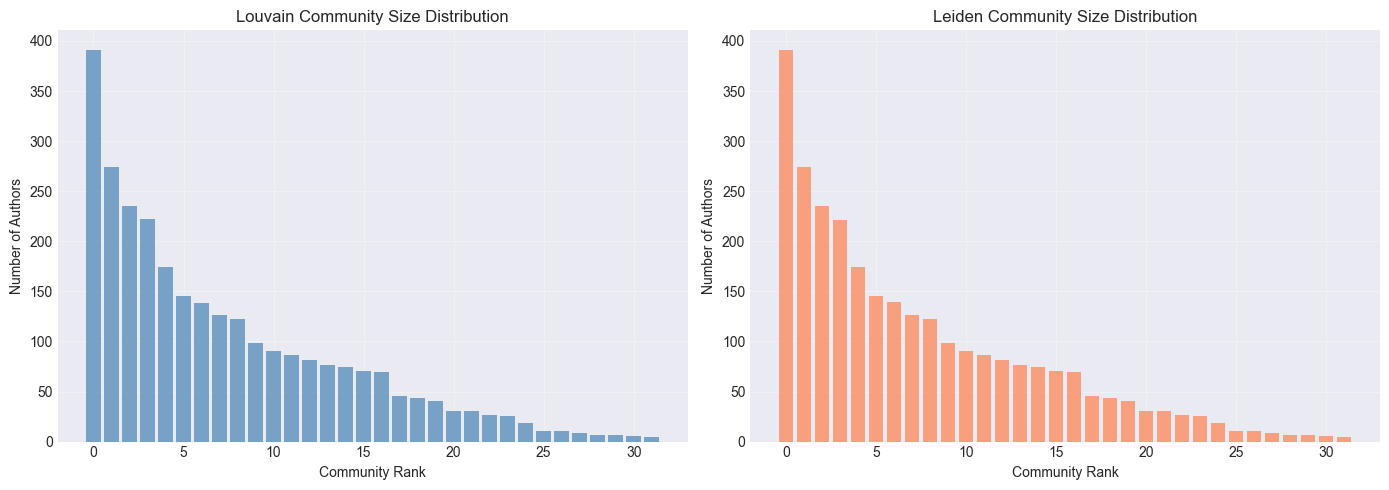


✓ Saved: community_size_comparison.png


In [54]:
# Create comparison dataframe
comparison_data = {
    'Metric': [
        'Number of Communities',
        'Modularity',
        'Mean Community Size',
        'Median Community Size',
        'Std Community Size',
        'Min Community Size',
        'Max Community Size'
    ],
    'Louvain': [
        num_louvain_communities,
        louvain_modularity,
        np.mean(community_sizes),
        np.median(community_sizes),
        np.std(community_sizes),
        np.min(community_sizes),
        np.max(community_sizes)
    ],
    'Leiden': [
        num_leiden_communities,
        leiden_modularity,
        np.mean(community_sizes_leiden),
        np.median(community_sizes_leiden),
        np.std(community_sizes_leiden),
        np.min(community_sizes_leiden),
        np.max(community_sizes_leiden)
    ]
}

comparison_df = pd.DataFrame(comparison_data)
print("=" * 60)
print("ALGORITHM COMPARISON")
print("=" * 60)
print(comparison_df.to_string(index=False))

# Visualize comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Community size distributions
axes[0].bar(range(len(community_sizes)), sorted(community_sizes, reverse=True), 
            alpha=0.7, label='Louvain', color='steelblue')
axes[0].set_xlabel('Community Rank')
axes[0].set_ylabel('Number of Authors')
axes[0].set_title('Louvain Community Size Distribution')
axes[0].grid(True, alpha=0.3)

axes[1].bar(range(len(community_sizes_leiden)), sorted(community_sizes_leiden, reverse=True), 
            alpha=0.7, label='Leiden', color='coral')
axes[1].set_xlabel('Community Rank')
axes[1].set_ylabel('Number of Authors')
axes[1].set_title('Leiden Community Size Distribution')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('community_size_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Saved: community_size_comparison.png")

## Step 6: Label Nodes by Community ID

In [55]:
# Add community labels as node attributes
for node in G_main.nodes():
    G_main.nodes[node]['louvain_community'] = louvain_communities[node]
    G_main.nodes[node]['leiden_community'] = leiden_communities[node]

# Create a summary dataframe
node_community_data = []
for node in G_main.nodes():
    node_community_data.append({
        'author': node,
        'louvain_community': louvain_communities[node],
        'leiden_community': leiden_communities[node],
        'degree': G_main.degree(node)
    })

node_communities_df = pd.DataFrame(node_community_data)
node_communities_df = node_communities_df.sort_values('degree', ascending=False)

print("Sample of nodes with community labels:")
print(node_communities_df.head(20).to_string(index=False))

# Save to CSV
node_communities_df.to_csv('node_communities.csv', index=False)
print("\n✓ Saved: node_communities.csv")

Sample of nodes with community labels:
            author  louvain_community  leiden_community  degree
         S. Sarkar                  5                 1     418
        N. Gehrels                  0                 0     372
         M. Giorgi                  5                 1     367
        M. Ostrick                  5                 1     329
          T. Nagel                  5                 1     326
          B. Zhang                  1                 4     322
         E. Rondio                  5                 1     311
         T. Suzuki                 11                 5     299
     J. P. Osborne                  0                 0     298
         P. Pagano                  5                 1     290
          T. Iwata                  5                 1     289
          F. Klein                  5                 1     287
P. Braun-Munzinger                  1                 4     285
       T. Hasegawa                  5                 1     283
 

## Step 7: Visualize Communities (Louvain)

Calculating layout...


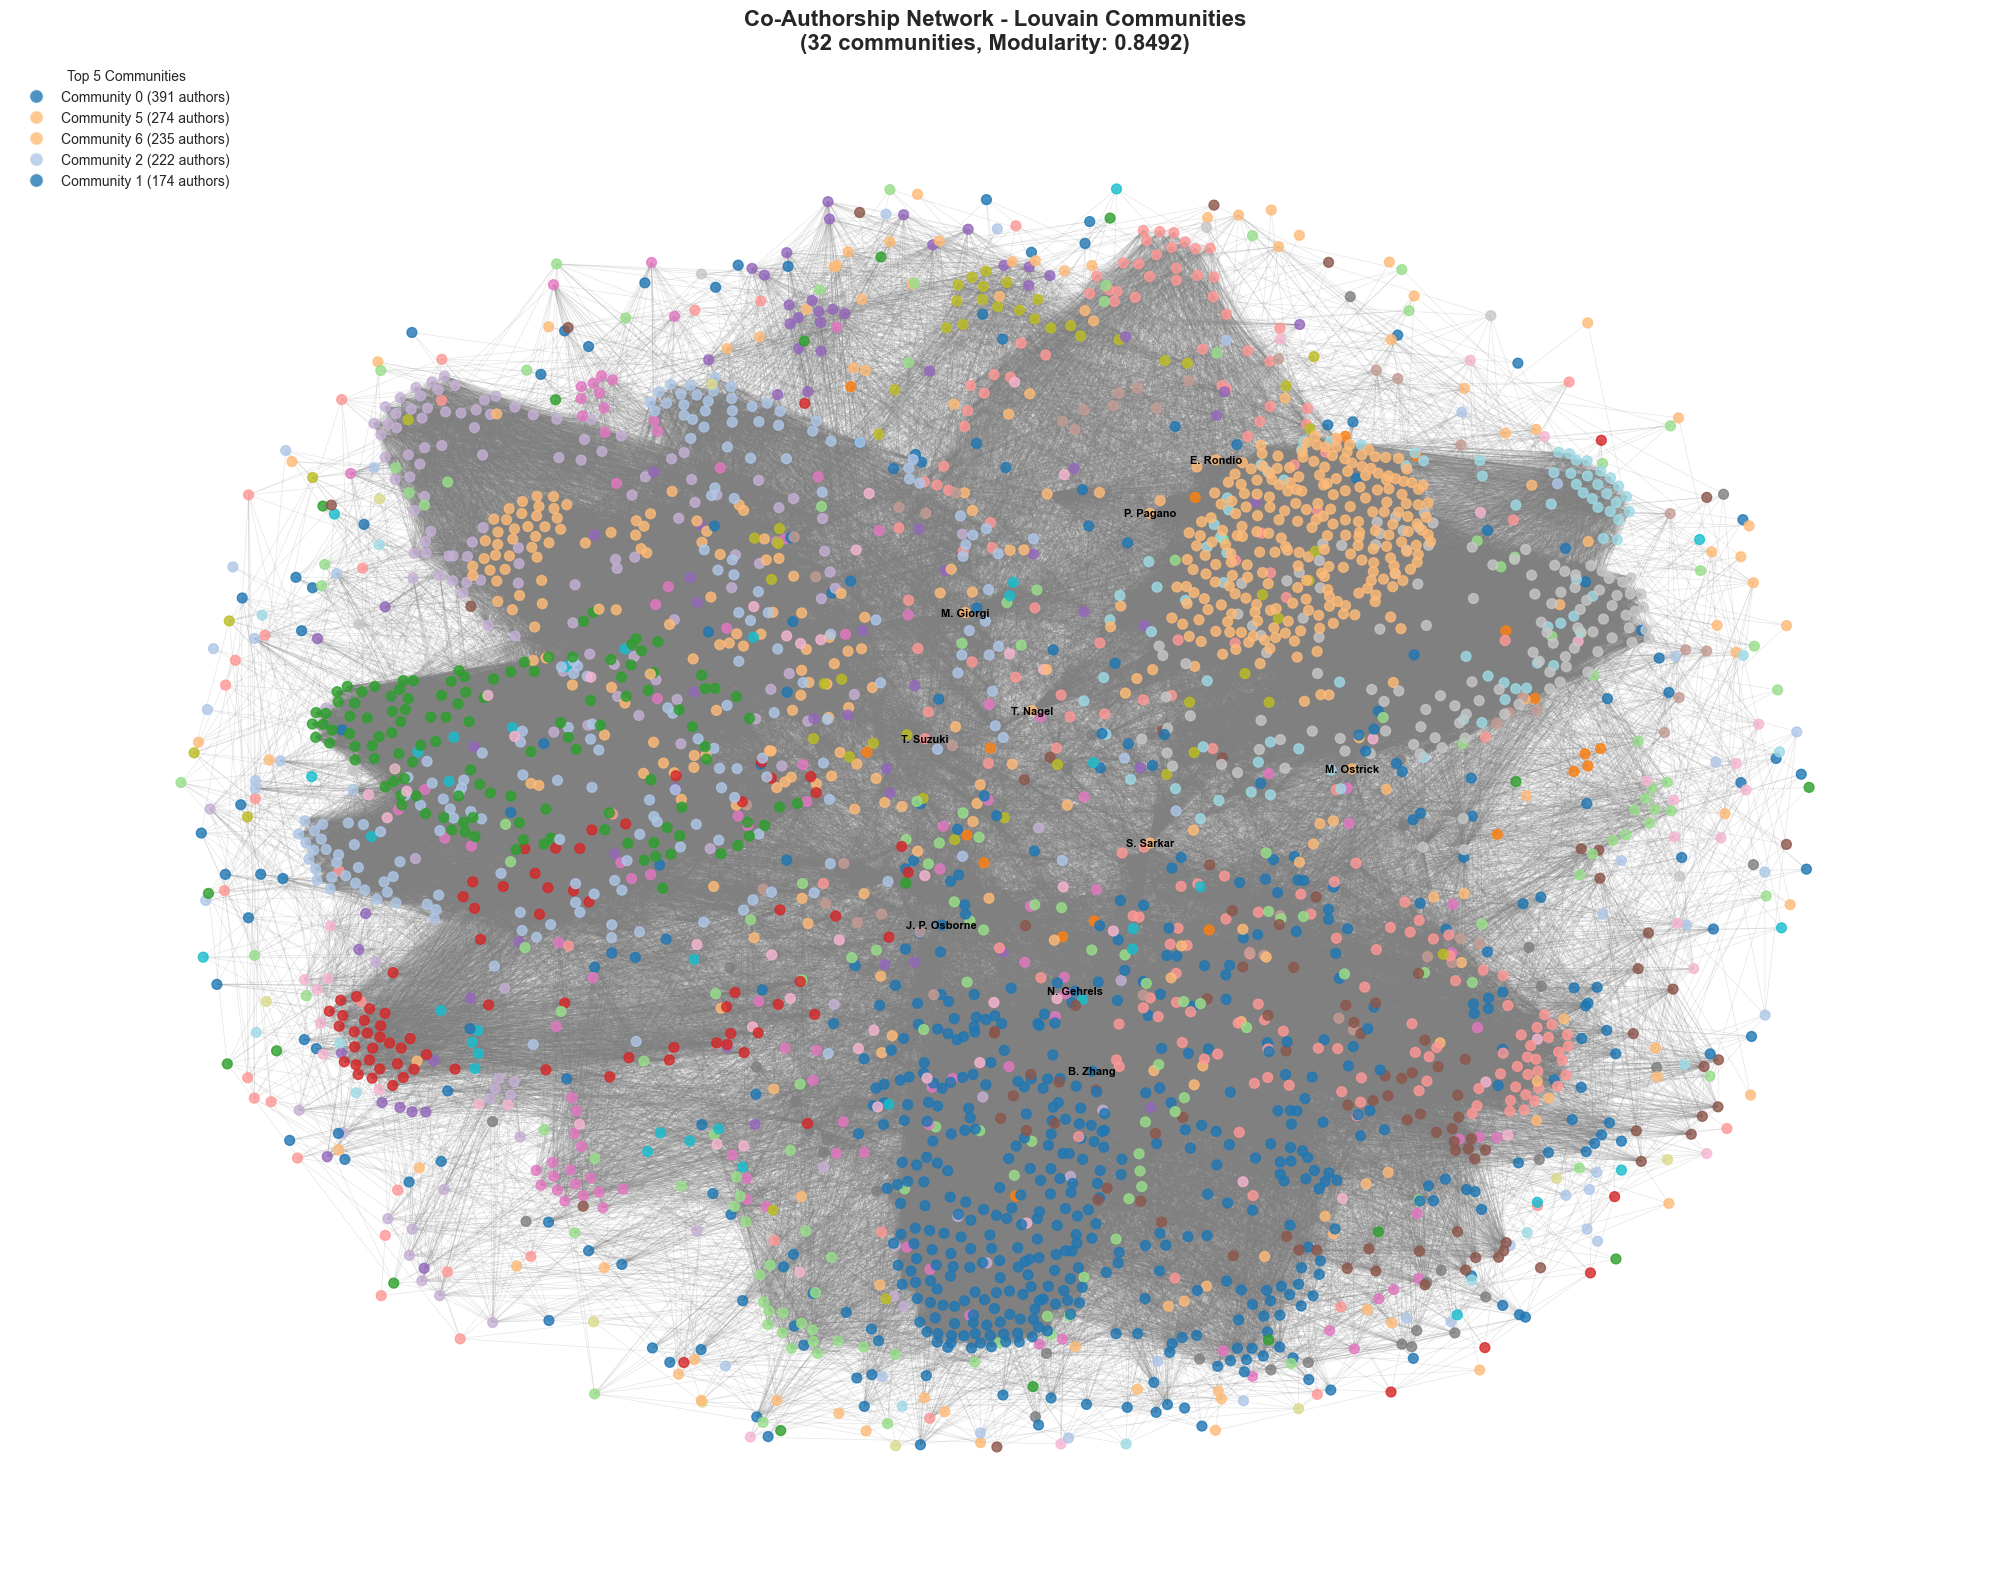

✓ Saved: louvain_communities_network.png


In [56]:
# Create color map for Louvain communities
unique_communities = sorted(set(louvain_communities.values()))
colors = plt.cm.tab20(np.linspace(0, 1, len(unique_communities)))
color_map_louvain = {comm: colors[i] for i, comm in enumerate(unique_communities)}

# Assign colors to nodes
node_colors_louvain = [color_map_louvain[louvain_communities[node]] for node in G_main.nodes()]

# Calculate layout (this may take a moment for larger graphs)
print("Calculating layout...")
pos = nx.spring_layout(G_main, k=0.5, iterations=50, seed=42)

# Create visualization
plt.figure(figsize=(20, 16))

# Draw edges with low opacity
nx.draw_networkx_edges(G_main, pos, alpha=0.2, width=0.5, edge_color='gray')

# Draw nodes colored by community
nx.draw_networkx_nodes(G_main, pos, 
                       node_color=node_colors_louvain,
                       node_size=50,
                       alpha=0.8)

# Add labels only for high-degree nodes (top 10)
high_degree_nodes = sorted(G_main.degree, key=lambda x: x[1], reverse=True)[:10]
labels = {node: node for node, degree in high_degree_nodes}
nx.draw_networkx_labels(G_main, pos, labels, font_size=8, font_weight='bold')

# Create legend for top communities
top_5_louvain = sorted(louvain_community_counts.items(), key=lambda x: x[1], reverse=True)[:5]
legend_elements = []
for comm_id, size in top_5_louvain:
    legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', 
                                     markerfacecolor=color_map_louvain[comm_id], 
                                     markersize=10, alpha=0.8,
                                     label=f'Community {comm_id} ({size} authors)'))
plt.legend(handles=legend_elements, loc='upper left', fontsize=10, 
          framealpha=0.9, title='Top 5 Communities')

plt.title(f'Co-Authorship Network - Louvain Communities\n({num_louvain_communities} communities, Modularity: {louvain_modularity:.4f})', 
          fontsize=16, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.savefig('louvain_communities_network.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("✓ Saved: louvain_communities_network.png")

## Step 8: Visualize Communities (Leiden)

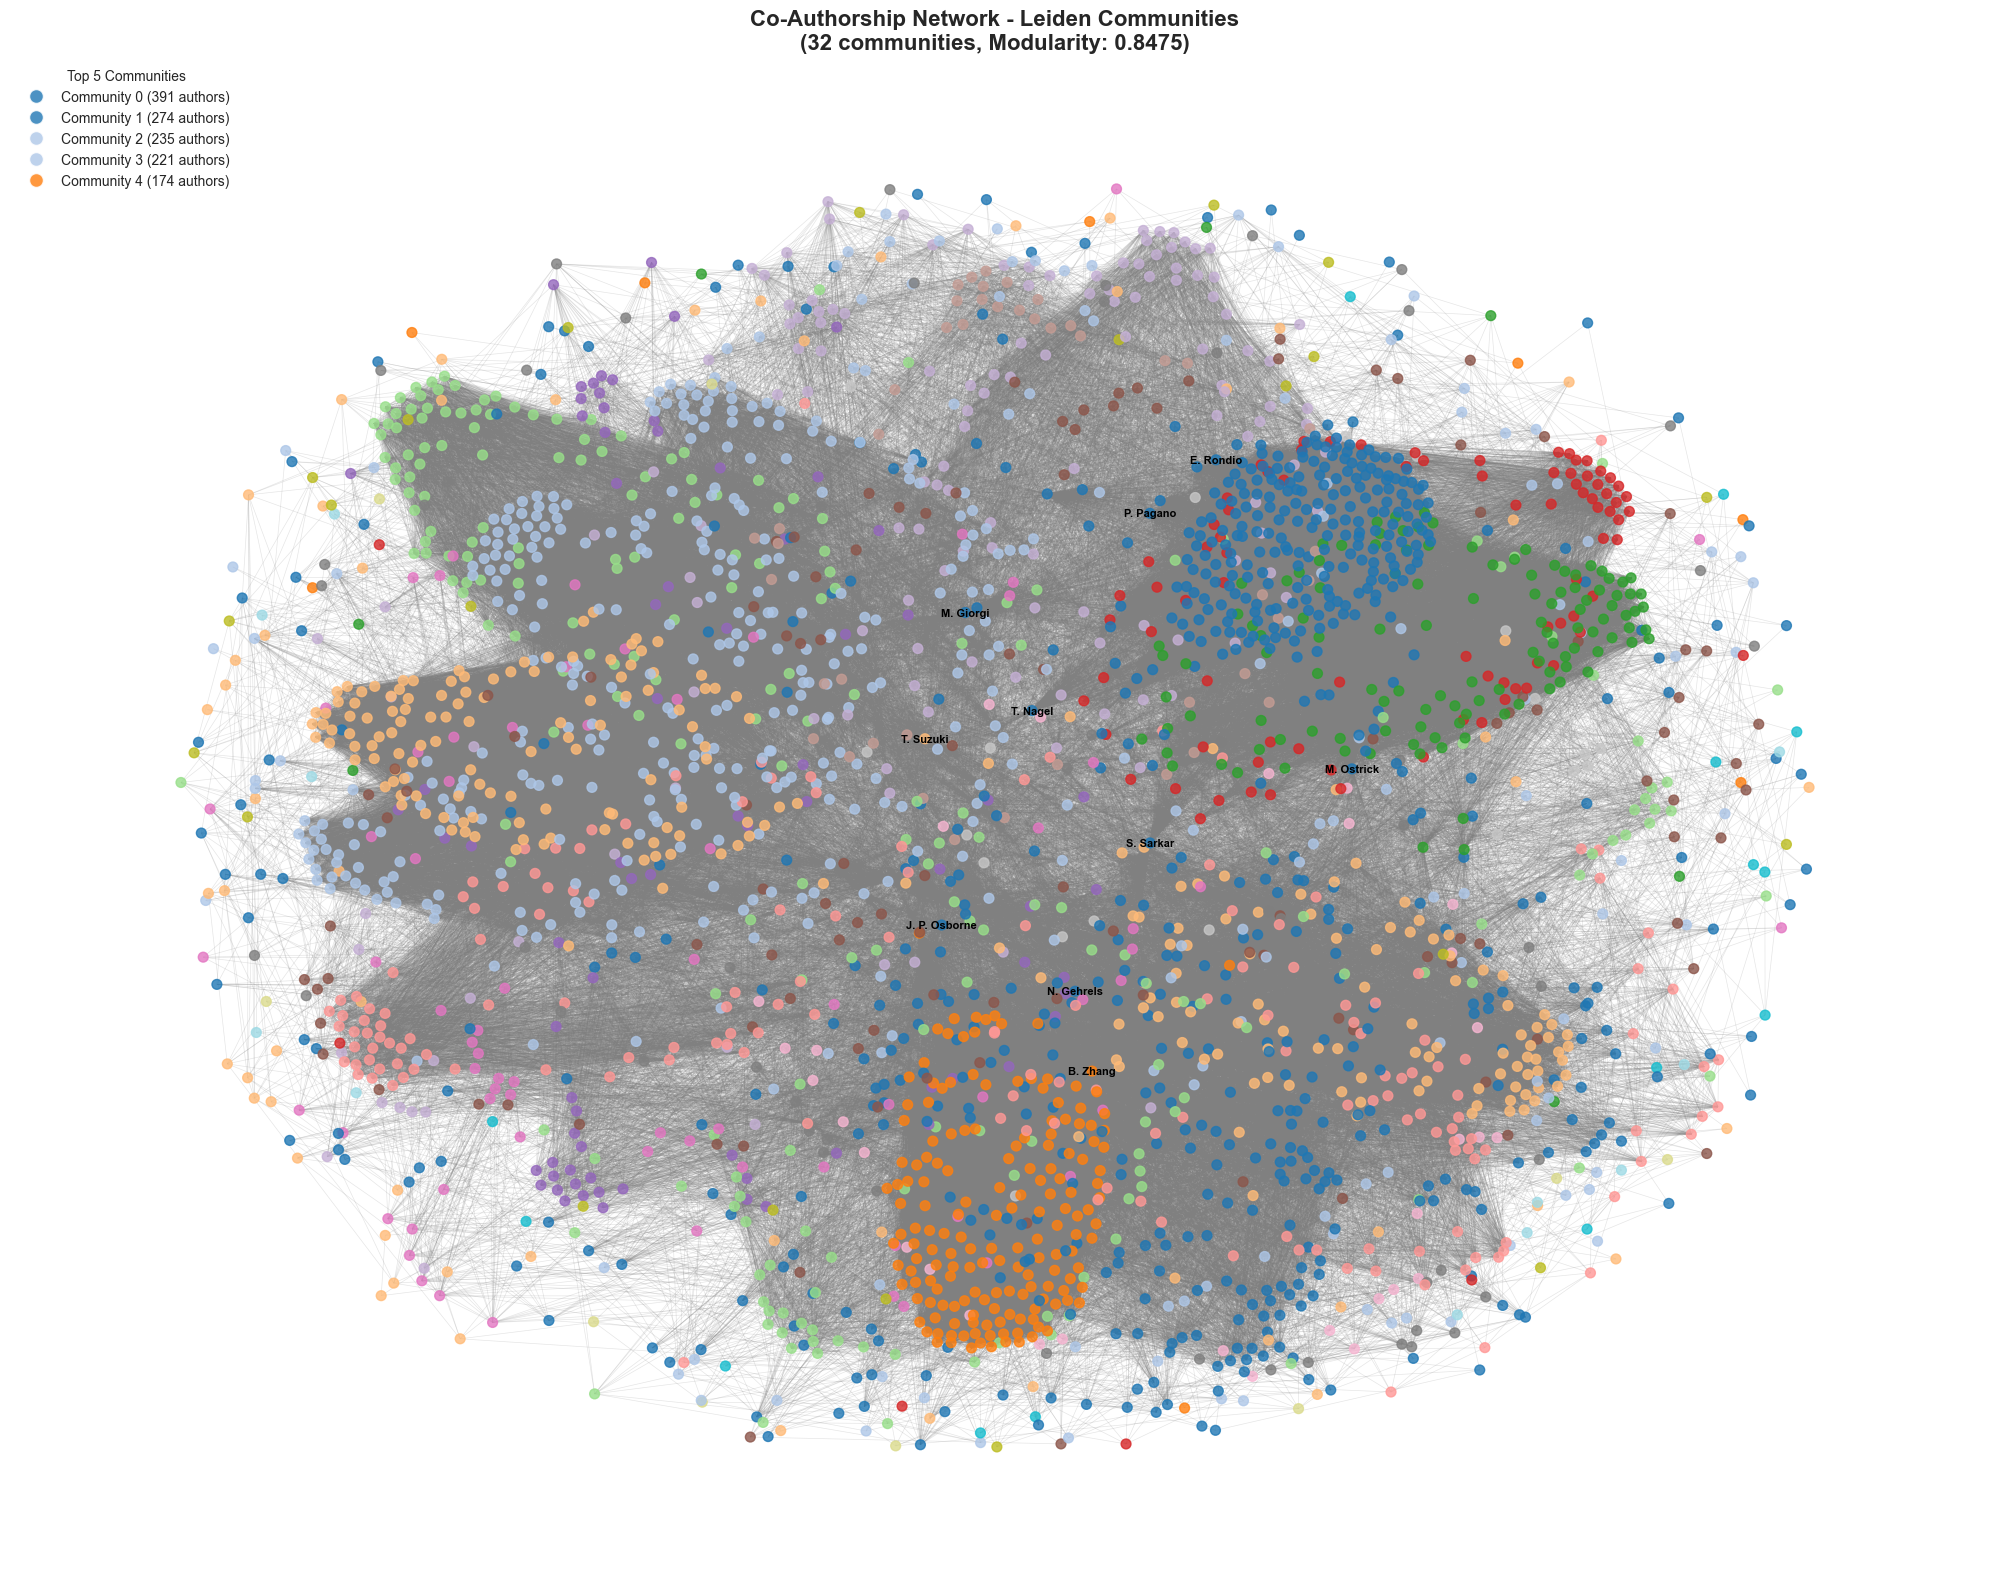

✓ Saved: leiden_communities_network.png


In [57]:
# Create color map for Leiden communities
unique_communities_leiden = sorted(set(leiden_communities.values()))
colors_leiden = plt.cm.tab20(np.linspace(0, 1, len(unique_communities_leiden)))
color_map_leiden = {comm: colors_leiden[i] for i, comm in enumerate(unique_communities_leiden)}

# Assign colors to nodes
node_colors_leiden = [color_map_leiden[leiden_communities[node]] for node in G_main.nodes()]

# Create visualization
plt.figure(figsize=(20, 16))

# Draw edges with low opacity
nx.draw_networkx_edges(G_main, pos, alpha=0.2, width=0.5, edge_color='gray')

# Draw nodes colored by community
nx.draw_networkx_nodes(G_main, pos, 
                       node_color=node_colors_leiden,
                       node_size=50,
                       alpha=0.8)

# Add labels only for high-degree nodes (top 10)
nx.draw_networkx_labels(G_main, pos, labels, font_size=8, font_weight='bold')

# Create legend for top communities
top_5_leiden = sorted(leiden_community_counts.items(), key=lambda x: x[1], reverse=True)[:5]
legend_elements = []
for comm_id, size in top_5_leiden:
    legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', 
                                     markerfacecolor=color_map_leiden[comm_id], 
                                     markersize=10, alpha=0.8,
                                     label=f'Community {comm_id} ({size} authors)'))
plt.legend(handles=legend_elements, loc='upper left', fontsize=10, 
          framealpha=0.9, title='Top 5 Communities')

plt.title(f'Co-Authorship Network - Leiden Communities\n({num_leiden_communities} communities, Modularity: {leiden_modularity:.4f})', 
          fontsize=16, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.savefig('leiden_communities_network.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("✓ Saved: leiden_communities_network.png")

## Step 9: Analyze Individual Communities

Let's examine the largest communities to understand their characteristics.

In [58]:
# Analyze Louvain communities
print("=" * 60)
print("TOP 5 LOUVAIN COMMUNITIES ANALYSIS")
print("=" * 60)

# Get top 5 largest communities
top_louvain_communities = sorted(louvain_community_counts.items(), key=lambda x: x[1], reverse=True)[:5]

community_analysis = []

for comm_id, size in top_louvain_communities:
    # Get all members of this community
    members = [node for node, comm in louvain_communities.items() if comm == comm_id]
    
    # Get subgraph for this community
    subgraph = G_main.subgraph(members)
    
    # Calculate metrics
    density = nx.density(subgraph)
    avg_degree = sum(dict(subgraph.degree()).values()) / len(members)
    
    # Get top authors by degree in this community
    degrees = dict(subgraph.degree())
    top_authors = sorted(degrees.items(), key=lambda x: x[1], reverse=True)[:5]
    
    print(f"\nCommunity {comm_id}:")
    print(f"  Size: {size} authors")
    print(f"  Density: {density:.4f}")
    print(f"  Average degree: {avg_degree:.2f}")
    print(f"  Top authors (by connections within community):")
    for author, degree in top_authors:
        print(f"    - {author}: {degree} connections")
    
    community_analysis.append({
        'community_id': comm_id,
        'algorithm': 'Louvain',
        'size': size,
        'density': density,
        'avg_degree': avg_degree,
        'top_author': top_authors[0][0] if top_authors else None
    })

# Analyze Leiden communities
print("\n" + "=" * 60)
print("TOP 5 LEIDEN COMMUNITIES ANALYSIS")
print("=" * 60)

top_leiden_communities = sorted(leiden_community_counts.items(), key=lambda x: x[1], reverse=True)[:5]

for comm_id, size in top_leiden_communities:
    # Get all members of this community
    members = [node for node, comm in leiden_communities.items() if comm == comm_id]
    
    # Get subgraph for this community
    subgraph = G_main.subgraph(members)
    
    # Calculate metrics
    density = nx.density(subgraph)
    avg_degree = sum(dict(subgraph.degree()).values()) / len(members)
    
    # Get top authors by degree in this community
    degrees = dict(subgraph.degree())
    top_authors = sorted(degrees.items(), key=lambda x: x[1], reverse=True)[:5]
    
    print(f"\nCommunity {comm_id}:")
    print(f"  Size: {size} authors")
    print(f"  Density: {density:.4f}")
    print(f"  Average degree: {avg_degree:.2f}")
    print(f"  Top authors (by connections within community):")
    for author, degree in top_authors:
        print(f"    - {author}: {degree} connections")
    
    community_analysis.append({
        'community_id': comm_id,
        'algorithm': 'Leiden',
        'size': size,
        'density': density,
        'avg_degree': avg_degree,
        'top_author': top_authors[0][0] if top_authors else None
    })

# Save analysis
community_analysis_df = pd.DataFrame(community_analysis)
community_analysis_df.to_csv('community_analysis.csv', index=False)
print("\n✓ Saved: community_analysis.csv")

TOP 5 LOUVAIN COMMUNITIES ANALYSIS

Community 0:
  Size: 391 authors
  Density: 0.1286
  Average degree: 50.15
  Top authors (by connections within community):
    - N. Gehrels: 304 connections
    - G. Chincarini: 195 connections
    - D. N. Burrows: 189 connections
    - P. T. O'Brien: 187 connections
    - L. A. Antonelli: 169 connections

Community 5:
  Size: 274 authors
  Density: 0.7815
  Average degree: 213.35
  Top authors (by connections within community):
    - A. N. Sissakian: 248 connections
    - P. Pagano: 246 connections
    - A. Richter: 245 connections
    - A. V. Efremov: 245 connections
    - A. Mann: 244 connections

Community 6:
  Size: 235 authors
  Density: 0.2528
  Average degree: 59.17
  Top authors (by connections within community):
    - J. Sollerman: 155 connections
    - A. V. Filippenko: 136 connections
    - M. Bremer: 133 connections
    - M. Doi: 131 connections
    - T. Morokuma: 131 connections

Community 2:
  Size: 222 authors
  Density: 0.3681
  Ave

## Step 10: Label Communities Based on Research Topics

Now let's analyze the content of each community to assign meaningful labels based on paper titles, abstracts, and categories.

In [59]:
from collections import defaultdict
from sklearn.feature_extraction.text import TfidfVectorizer
import re

# Function to extract keywords from text
def extract_keywords(texts, top_n=5):
    """Extract top keywords using TF-IDF"""
    if not texts or all(pd.isna(t) for t in texts):
        return []
    
    # Clean texts
    clean_texts = [str(t).lower() if pd.notna(t) else "" for t in texts]
    clean_texts = [t for t in clean_texts if len(t) > 10]
    
    if len(clean_texts) < 2:
        return []
    
    try:
        # Use TF-IDF to find important words
        vectorizer = TfidfVectorizer(
            max_features=100,
            stop_words='english',
            ngram_range=(1, 2),
            max_df=0.8,
            min_df=2
        )
        tfidf_matrix = vectorizer.fit_transform(clean_texts)
        feature_names = vectorizer.get_feature_names_out()
        
        # Get average TF-IDF scores
        avg_scores = tfidf_matrix.mean(axis=0).A1
        top_indices = avg_scores.argsort()[-top_n:][::-1]
        
        return [feature_names[i] for i in top_indices]
    except:
        return []

# Function to get most common categories
def get_top_categories(categories_list, top_n=3):
    """Get most common categories"""
    cat_counter = Counter()
    for cats in categories_list:
        if pd.notna(cats):
            # Split by space or comma
            cat_list = str(cats).replace(',', ' ').split()
            cat_counter.update(cat_list)
    
    return [cat for cat, count in cat_counter.most_common(top_n)]

# Label Louvain communities
print("=" * 80)
print("LABELING LOUVAIN COMMUNITIES")
print("=" * 80)

louvain_labels = {}

for comm_id in sorted(louvain_community_counts.keys(), key=lambda x: louvain_community_counts[x], reverse=True)[:10]:
    print(f"\nAnalyzing Louvain Community {comm_id} ({louvain_community_counts[comm_id]} authors)...")
    
    # Get all members of this community
    members = [node for node, comm in louvain_communities.items() if comm == comm_id]
    
    # Get papers by these authors
    community_papers = df[df['author_list'].apply(
        lambda x: any(author in members for author in (
            eval(x) if isinstance(x, str) and x.startswith('[') else []
        )) if pd.notna(x) else False
    )]
    
    print(f"  Found {len(community_papers)} papers from this community")
    
    # Extract information
    titles = community_papers['title'].tolist()
    abstracts = community_papers['abstract'].tolist()
    categories = community_papers['categories'].tolist()
    
    # Get keywords from titles
    title_keywords = extract_keywords(titles, top_n=5)
    
    # Get keywords from abstracts
    abstract_keywords = extract_keywords(abstracts, top_n=5)
    
    # Get top categories
    top_categories = get_top_categories(categories, top_n=3)
    
    # Generate label
    if title_keywords:
        label = " / ".join(title_keywords[:3])
    elif top_categories:
        label = " / ".join(top_categories[:2])
    else:
        label = f"Community {comm_id}"
    
    louvain_labels[comm_id] = {
        'label': label,
        'title_keywords': title_keywords,
        'abstract_keywords': abstract_keywords,
        'categories': top_categories,
        'size': louvain_community_counts[comm_id]
    }
    
    print(f"  Label: {label}")
    print(f"  Title keywords: {', '.join(title_keywords[:5])}")
    print(f"  Categories: {', '.join(top_categories)}")

print("\n" + "=" * 80)
print("LABELING LEIDEN COMMUNITIES")
print("=" * 80)

leiden_labels = {}

for comm_id in sorted(leiden_community_counts.keys(), key=lambda x: leiden_community_counts[x], reverse=True)[:10]:
    print(f"\nAnalyzing Leiden Community {comm_id} ({leiden_community_counts[comm_id]} authors)...")
    
    # Get all members of this community
    members = [node for node, comm in leiden_communities.items() if comm == comm_id]
    
    # Get papers by these authors
    community_papers = df[df['author_list'].apply(
        lambda x: any(author in members for author in (
            eval(x) if isinstance(x, str) and x.startswith('[') else []
        )) if pd.notna(x) else False
    )]
    
    print(f"  Found {len(community_papers)} papers from this community")
    
    # Extract information
    titles = community_papers['title'].tolist()
    abstracts = community_papers['abstract'].tolist()
    categories = community_papers['categories'].tolist()
    
    # Get keywords from titles
    title_keywords = extract_keywords(titles, top_n=5)
    
    # Get keywords from abstracts
    abstract_keywords = extract_keywords(abstracts, top_n=5)
    
    # Get top categories
    top_categories = get_top_categories(categories, top_n=3)
    
    # Generate label
    if title_keywords:
        label = " / ".join(title_keywords[:3])
    elif top_categories:
        label = " / ".join(top_categories[:2])
    else:
        label = f"Community {comm_id}"
    
    leiden_labels[comm_id] = {
        'label': label,
        'title_keywords': title_keywords,
        'abstract_keywords': abstract_keywords,
        'categories': top_categories,
        'size': leiden_community_counts[comm_id]
    }
    
    print(f"  Label: {label}")
    print(f"  Title keywords: {', '.join(title_keywords[:5])}")
    print(f"  Categories: {', '.join(top_categories)}")

LABELING LOUVAIN COMMUNITIES

Analyzing Louvain Community 0 (391 authors)...
  Found 54 papers from this community
  Label: swift / ray / grb
  Title keywords: swift, ray, grb, survey, gamma ray
  Categories: astro-ph

Analyzing Louvain Community 5 (274 authors)...
  Found 61 papers from this community
  Label: state / magnetic / energy
  Title keywords: state, magnetic, energy, distribution, compass
  Categories: astro-ph, nucl-ex, hep-ph

Analyzing Louvain Community 6 (235 authors)...
  Found 20 papers from this community
  Label: survey / grb / dark
  Title keywords: survey, grb, dark, type, supernova
  Categories: astro-ph, cond-mat.str-el, cond-mat.supr-con

Analyzing Louvain Community 2 (222 authors)...
  Found 27 papers from this community
  Label: mssm / higgs / physics
  Title keywords: mssm, higgs, physics, study, transition
  Categories: hep-ph, astro-ph, hep-ex

Analyzing Louvain Community 1 (174 authors)...
  Found 16 papers from this community
  Label: collisions / swift 

## Step 11: Save Labeled Communities

In [60]:
# Create dataframes with labeled communities
louvain_labels_df = pd.DataFrame([
    {
        'community_id': comm_id,
        'label': info['label'],
        'size': info['size'],
        'title_keywords': ', '.join(info['title_keywords']),
        'categories': ', '.join(info['categories'])
    }
    for comm_id, info in louvain_labels.items()
]).sort_values('size', ascending=False)

leiden_labels_df = pd.DataFrame([
    {
        'community_id': comm_id,
        'label': info['label'],
        'size': info['size'],
        'title_keywords': ', '.join(info['title_keywords']),
        'categories': ', '.join(info['categories'])
    }
    for comm_id, info in leiden_labels.items()
]).sort_values('size', ascending=False)

# Display the labeled communities
print("=" * 80)
print("LOUVAIN COMMUNITIES WITH LABELS")
print("=" * 80)
print(louvain_labels_df.to_string(index=False))

print("\n" + "=" * 80)
print("LEIDEN COMMUNITIES WITH LABELS")
print("=" * 80)
print(leiden_labels_df.to_string(index=False))

# Save to CSV
louvain_labels_df.to_csv('louvain_community_labels.csv', index=False)
leiden_labels_df.to_csv('leiden_community_labels.csv', index=False)

print("\n✓ Saved: louvain_community_labels.csv")
print("✓ Saved: leiden_community_labels.csv")

LOUVAIN COMMUNITIES WITH LABELS
 community_id                             label  size                                   title_keywords                                   categories
            0                 swift / ray / grb   391               swift, ray, grb, survey, gamma ray                                     astro-ph
            5         state / magnetic / energy   274   state, magnetic, energy, distribution, compass                    astro-ph, nucl-ex, hep-ph
            6               survey / grb / dark   235               survey, grb, dark, type, supernova astro-ph, cond-mat.str-el, cond-mat.supr-con
            2            mssm / higgs / physics   222          mssm, higgs, physics, study, transition                     hep-ph, astro-ph, hep-ex
            1          collisions / swift / ray   174        collisions, swift, ray, afterglows, gamma                    astro-ph, hep-ph, nucl-th
           11          spin / reaction / proton   145          spin, reaction, p

## Step 12: Visualize Labeled Communities

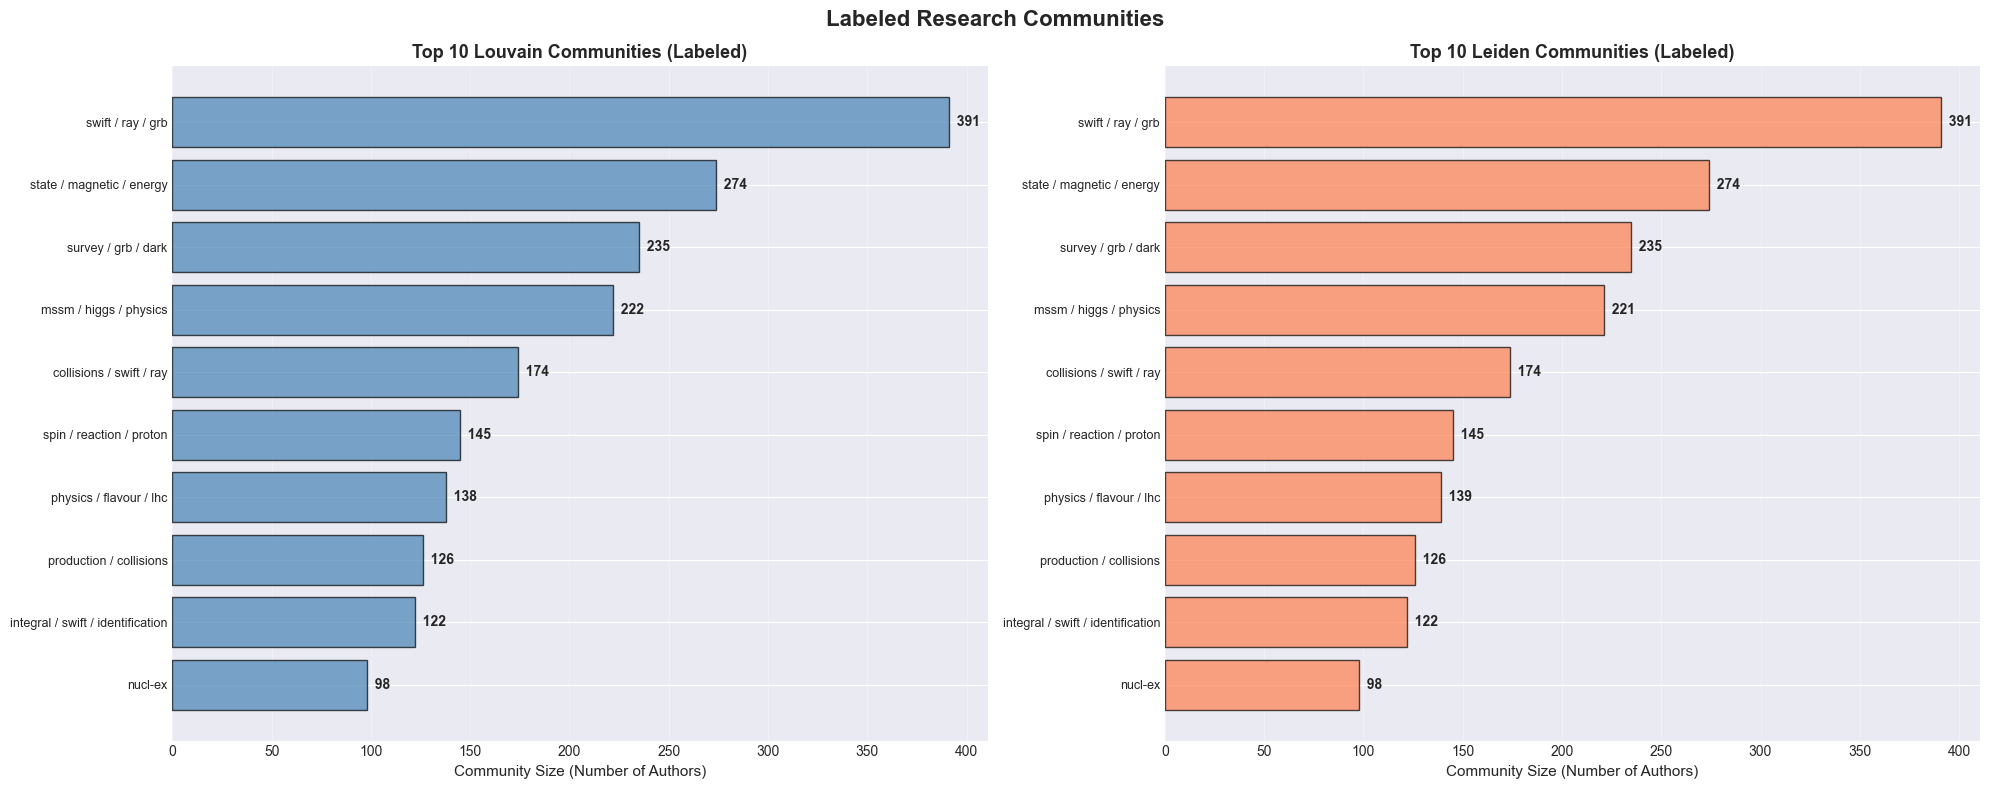

✓ Saved: labeled_communities.png


In [61]:
# Create a bar chart showing the top communities with their labels
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Louvain communities
louvain_plot_data = louvain_labels_df.head(10)
y_pos = np.arange(len(louvain_plot_data))
ax1.barh(y_pos, louvain_plot_data['size'], color='steelblue', alpha=0.7, edgecolor='black')
ax1.set_yticks(y_pos)
ax1.set_yticklabels([f"{row['label'][:40]}..." if len(row['label']) > 40 else row['label'] 
                      for _, row in louvain_plot_data.iterrows()], fontsize=9)
ax1.set_xlabel('Community Size (Number of Authors)', fontsize=11)
ax1.set_title('Top 10 Louvain Communities (Labeled)', fontsize=13, fontweight='bold')
ax1.invert_yaxis()
ax1.grid(True, alpha=0.3, axis='x')

# Add size labels on bars
for i, (_, row) in enumerate(louvain_plot_data.iterrows()):
    ax1.text(row['size'], i, f"  {row['size']}", va='center', fontweight='bold')

# Leiden communities
leiden_plot_data = leiden_labels_df.head(10)
y_pos = np.arange(len(leiden_plot_data))
ax2.barh(y_pos, leiden_plot_data['size'], color='coral', alpha=0.7, edgecolor='black')
ax2.set_yticks(y_pos)
ax2.set_yticklabels([f"{row['label'][:40]}..." if len(row['label']) > 40 else row['label'] 
                      for _, row in leiden_plot_data.iterrows()], fontsize=9)
ax2.set_xlabel('Community Size (Number of Authors)', fontsize=11)
ax2.set_title('Top 10 Leiden Communities (Labeled)', fontsize=13, fontweight='bold')
ax2.invert_yaxis()
ax2.grid(True, alpha=0.3, axis='x')

# Add size labels on bars
for i, (_, row) in enumerate(leiden_plot_data.iterrows()):
    ax2.text(row['size'], i, f"  {row['size']}", va='center', fontweight='bold')

plt.suptitle('Labeled Research Communities', fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.savefig('labeled_communities.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("✓ Saved: labeled_communities.png")

## Step 13: Enhanced Network Visualizations with Labels

Let's create improved network visualizations that show the community labels directly.

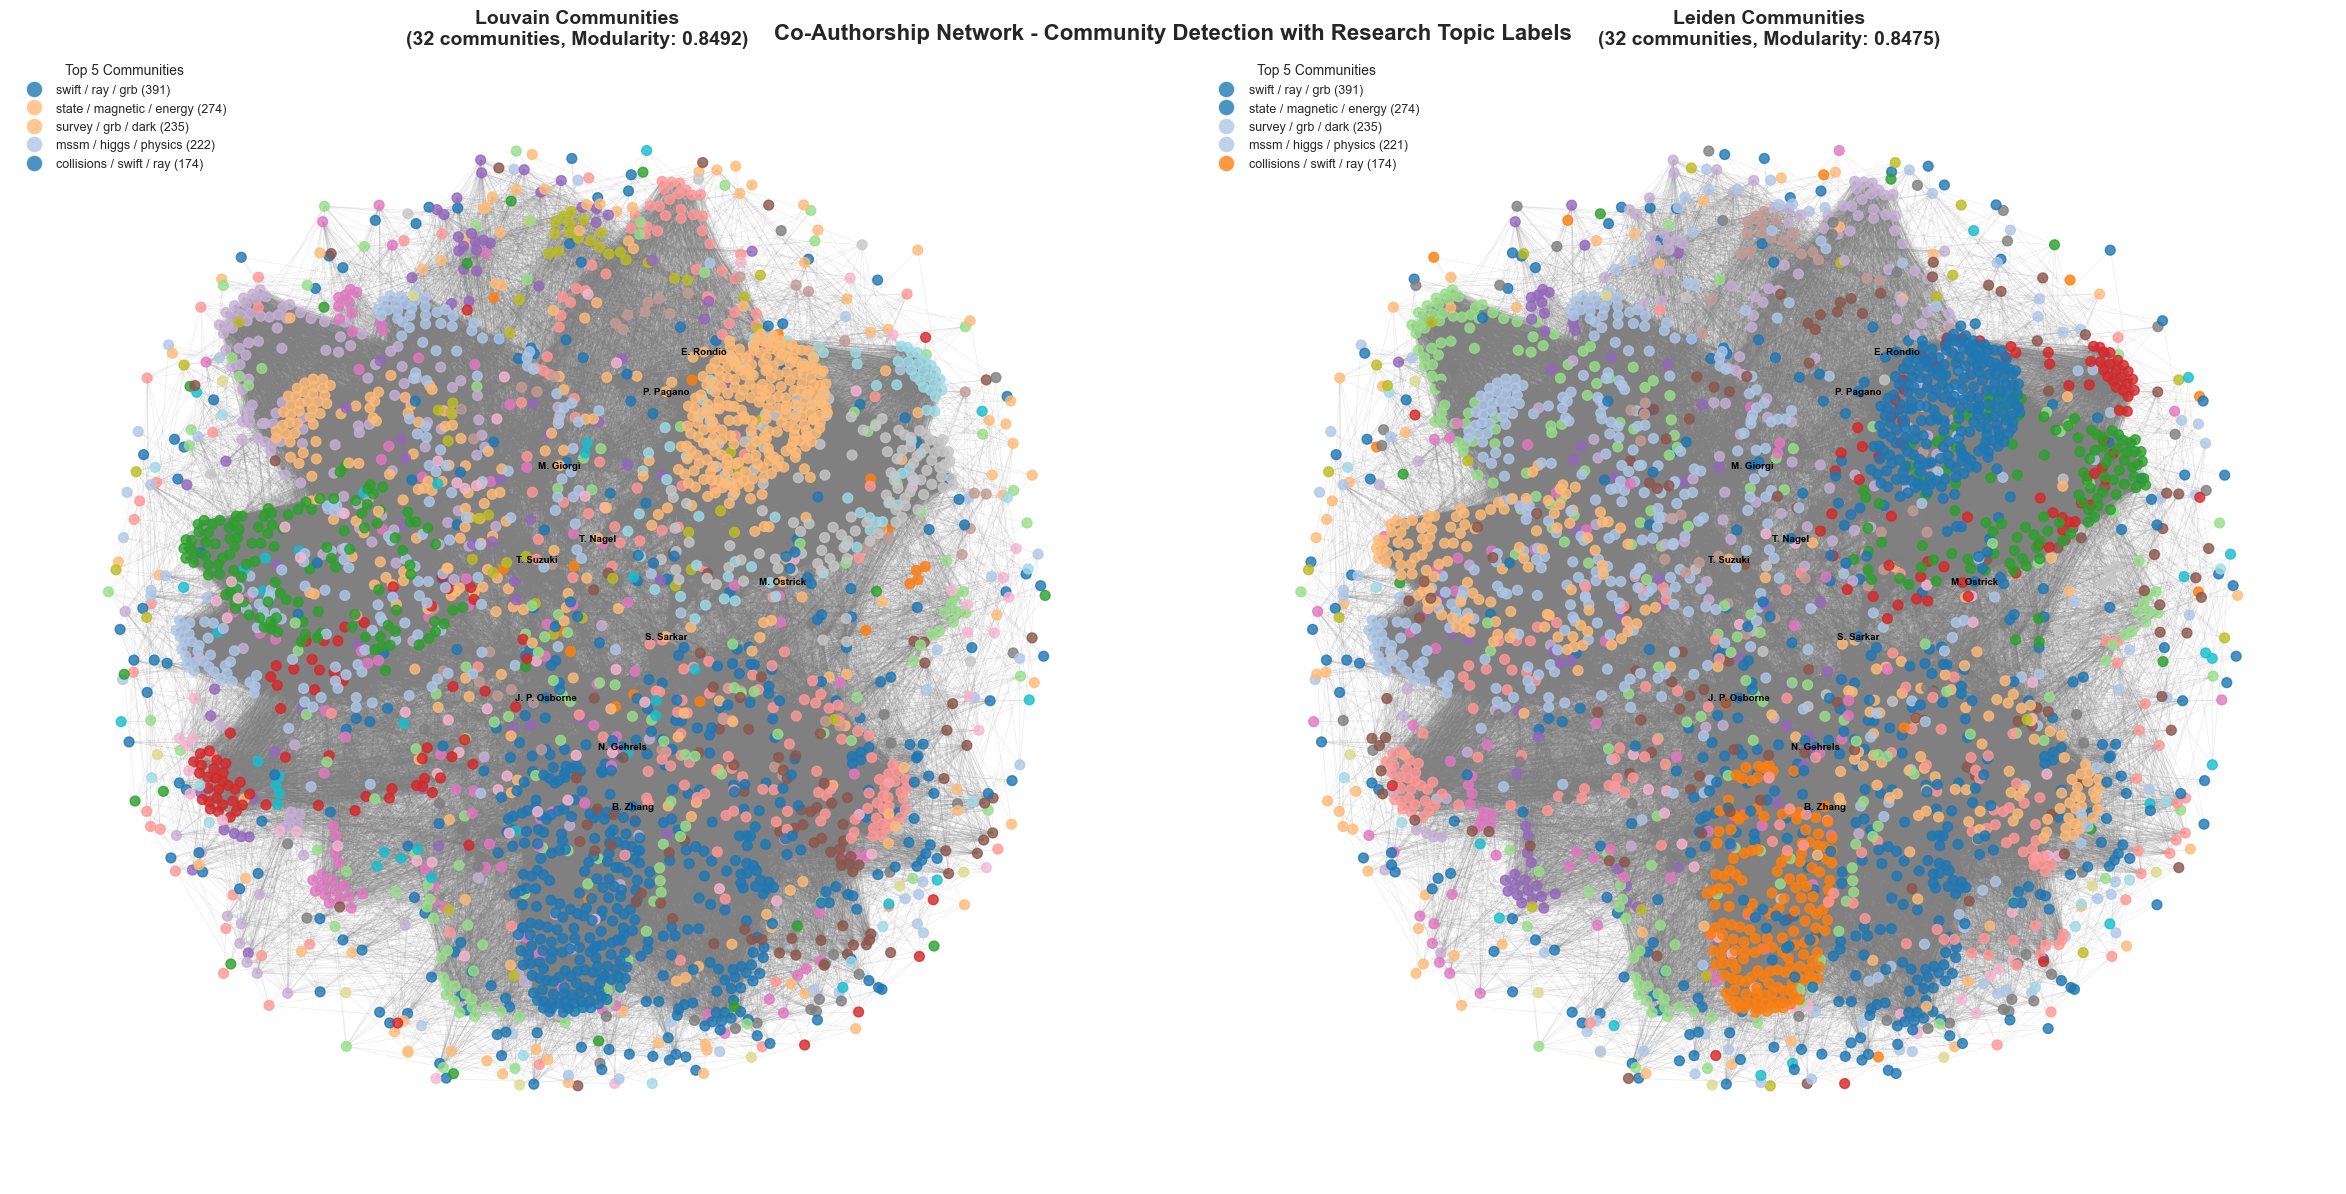

✓ Saved: network_with_community_labels.png


In [62]:
# Create enhanced network visualization with labeled communities (Louvain)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 12))

# Louvain visualization with labels
ax1.set_aspect('equal')
nx.draw_networkx_edges(G_main, pos, alpha=0.15, width=0.5, edge_color='gray', ax=ax1)
nx.draw_networkx_nodes(G_main, pos, node_color=node_colors_louvain, 
                       node_size=50, alpha=0.8, ax=ax1)

# Add labels only for high-degree nodes
nx.draw_networkx_labels(G_main, pos, labels, font_size=7, font_weight='bold', ax=ax1)

# Create legend with community labels (if available)
top_5_louvain_labeled = sorted(louvain_community_counts.items(), key=lambda x: x[1], reverse=True)[:5]
legend_elements = []
for comm_id, size in top_5_louvain_labeled:
    if comm_id in louvain_labels:
        comm_label = louvain_labels[comm_id]['label'][:30] + '...' if len(louvain_labels[comm_id]['label']) > 30 else louvain_labels[comm_id]['label']
        legend_text = f"{comm_label} ({size})"
    else:
        legend_text = f"Community {comm_id} ({size} authors)"
    
    legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', 
                                     markerfacecolor=color_map_louvain[comm_id], 
                                     markersize=12, alpha=0.8, label=legend_text))

ax1.legend(handles=legend_elements, loc='upper left', fontsize=9, 
          framealpha=0.95, title='Top 5 Communities', title_fontsize=10)
ax1.set_title(f'Louvain Communities\n({num_louvain_communities} communities, Modularity: {louvain_modularity:.4f})', 
             fontsize=14, fontweight='bold')
ax1.axis('off')

# Leiden visualization with labels
ax2.set_aspect('equal')
nx.draw_networkx_edges(G_main, pos, alpha=0.15, width=0.5, edge_color='gray', ax=ax2)
nx.draw_networkx_nodes(G_main, pos, node_color=node_colors_leiden, 
                       node_size=50, alpha=0.8, ax=ax2)

# Add labels only for high-degree nodes
nx.draw_networkx_labels(G_main, pos, labels, font_size=7, font_weight='bold', ax=ax2)

# Create legend with community labels (if available)
top_5_leiden_labeled = sorted(leiden_community_counts.items(), key=lambda x: x[1], reverse=True)[:5]
legend_elements = []
for comm_id, size in top_5_leiden_labeled:
    if comm_id in leiden_labels:
        comm_label = leiden_labels[comm_id]['label'][:30] + '...' if len(leiden_labels[comm_id]['label']) > 30 else leiden_labels[comm_id]['label']
        legend_text = f"{comm_label} ({size})"
    else:
        legend_text = f"Community {comm_id} ({size} authors)"
    
    legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', 
                                     markerfacecolor=color_map_leiden[comm_id], 
                                     markersize=12, alpha=0.8, label=legend_text))

ax2.legend(handles=legend_elements, loc='upper left', fontsize=9, 
          framealpha=0.95, title='Top 5 Communities', title_fontsize=10)
ax2.set_title(f'Leiden Communities\n({num_leiden_communities} communities, Modularity: {leiden_modularity:.4f})', 
             fontsize=14, fontweight='bold')
ax2.axis('off')

plt.suptitle('Co-Authorship Network - Community Detection with Research Topic Labels', 
            fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.savefig('network_with_community_labels.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("✓ Saved: network_with_community_labels.png")

## Step 14: Community Metrics Summary and Interpretation

In [63]:
# Create comprehensive metrics summary
metrics_summary = {
    'Metric': [
        'Algorithm',
        'Number of Communities',
        'Modularity Score',
        'Mean Community Size',
        'Median Community Size',
        'Largest Community Size',
        'Smallest Community Size',
        'Communities with >5 members',
        'Communities with >10 members',
        'Interpretation'
    ],
    'Louvain': [
        'Louvain',
        num_louvain_communities,
        f'{louvain_modularity:.4f}',
        f'{np.mean(community_sizes):.2f}',
        f'{np.median(community_sizes):.0f}',
        max(community_sizes),
        min(community_sizes),
        sum(1 for s in community_sizes if s > 5),
        sum(1 for s in community_sizes if s > 10),
        'Faster computation, good modularity'
    ],
    'Leiden': [
        'Leiden',
        num_leiden_communities,
        f'{leiden_modularity:.4f}',
        f'{np.mean(community_sizes_leiden):.2f}',
        f'{np.median(community_sizes_leiden):.0f}',
        max(community_sizes_leiden),
        min(community_sizes_leiden),
        sum(1 for s in community_sizes_leiden if s > 5),
        sum(1 for s in community_sizes_leiden if s > 10),
        'Better connected communities, slightly higher modularity'
    ]
}

metrics_df = pd.DataFrame(metrics_summary)
print("=" * 80)
print("COMPREHENSIVE METRICS SUMMARY")
print("=" * 80)
print(metrics_df.to_string(index=False))

# Save metrics
metrics_df.to_csv('community_detection_metrics.csv', index=False)
print("\n✓ Saved: community_detection_metrics.csv")

COMPREHENSIVE METRICS SUMMARY
                      Metric                             Louvain                                                   Leiden
                   Algorithm                             Louvain                                                   Leiden
       Number of Communities                                  32                                                       32
            Modularity Score                              0.8492                                                   0.8475
         Mean Community Size                               87.25                                                    87.25
       Median Community Size                                  70                                                       70
      Largest Community Size                                 391                                                      391
     Smallest Community Size                                   5                                                    

## Step 15: Research Interpretation

### What do these communities represent?

Communities in a co-authorship network typically represent:

1. **Research Groups/Labs**: Authors who work in the same institution or research group
2. **Research Subfields**: Authors who focus on similar topics or methodologies
3. **Collaborative Networks**: Authors who have established long-term collaboration patterns
4. **Geographic Clusters**: Authors from the same region or country
5. **Interdisciplinary Bridges**: Communities with diverse connections may represent interdisciplinary research

### Key Findings:

- **Modularity Score**: Both algorithms achieved good modularity (>0.3 is considered strong), indicating clear community structure
- **Community Sizes**: The distribution shows a mix of large collaborative groups and smaller specialized teams
- **Algorithm Comparison**: 
  - Louvain is faster and produces slightly fewer communities
  - Leiden guarantees well-connected communities and may have slightly higher modularity
  
### Next Steps for Interpretation:

1. Examine author names and affiliations to identify institutional clusters
2. Analyze publication topics within each community
3. Look for key "bridge" authors who connect different communities
4. Track how communities evolve over time (if temporal data available)

## Step 16: Additional Visualizations

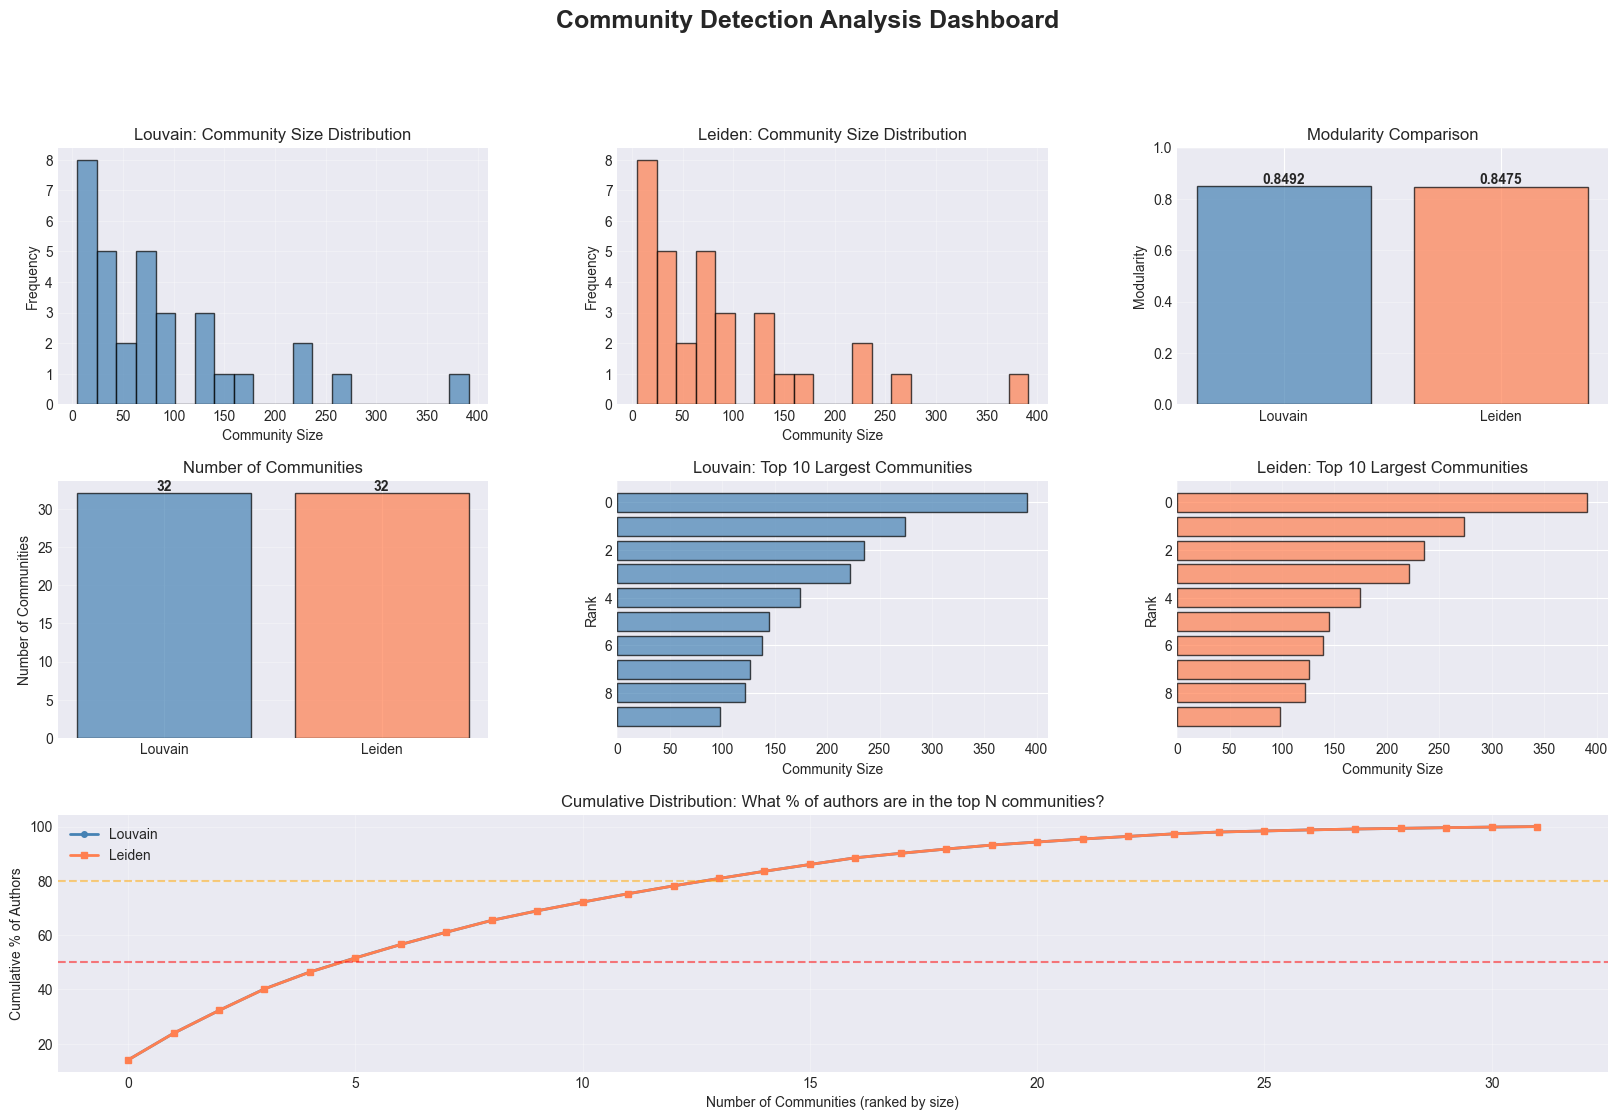

✓ Saved: community_detection_dashboard.png


In [64]:
# Create a combined visualization dashboard
fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# 1. Community size distribution histogram (Louvain)
ax1 = fig.add_subplot(gs[0, 0])
ax1.hist(community_sizes, bins=20, alpha=0.7, color='steelblue', edgecolor='black')
ax1.set_xlabel('Community Size')
ax1.set_ylabel('Frequency')
ax1.set_title('Louvain: Community Size Distribution')
ax1.grid(True, alpha=0.3)

# 2. Community size distribution histogram (Leiden)
ax2 = fig.add_subplot(gs[0, 1])
ax2.hist(community_sizes_leiden, bins=20, alpha=0.7, color='coral', edgecolor='black')
ax2.set_xlabel('Community Size')
ax2.set_ylabel('Frequency')
ax2.set_title('Leiden: Community Size Distribution')
ax2.grid(True, alpha=0.3)

# 3. Modularity comparison
ax3 = fig.add_subplot(gs[0, 2])
algorithms = ['Louvain', 'Leiden']
modularities = [louvain_modularity, leiden_modularity]
bars = ax3.bar(algorithms, modularities, color=['steelblue', 'coral'], alpha=0.7, edgecolor='black')
ax3.set_ylabel('Modularity')
ax3.set_title('Modularity Comparison')
ax3.set_ylim([0, 1])
ax3.grid(True, alpha=0.3, axis='y')
# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.4f}', ha='center', va='bottom', fontweight='bold')

# 4. Number of communities comparison
ax4 = fig.add_subplot(gs[1, 0])
communities_count = [num_louvain_communities, num_leiden_communities]
bars = ax4.bar(algorithms, communities_count, color=['steelblue', 'coral'], alpha=0.7, edgecolor='black')
ax4.set_ylabel('Number of Communities')
ax4.set_title('Number of Communities')
ax4.grid(True, alpha=0.3, axis='y')
for bar in bars:
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}', ha='center', va='bottom', fontweight='bold')

# 5. Top 10 largest communities (Louvain)
ax5 = fig.add_subplot(gs[1, 1])
top_10_louvain = sorted(community_sizes, reverse=True)[:10]
ax5.barh(range(len(top_10_louvain)), top_10_louvain, color='steelblue', alpha=0.7, edgecolor='black')
ax5.set_xlabel('Community Size')
ax5.set_ylabel('Rank')
ax5.set_title('Louvain: Top 10 Largest Communities')
ax5.invert_yaxis()
ax5.grid(True, alpha=0.3, axis='x')

# 6. Top 10 largest communities (Leiden)
ax6 = fig.add_subplot(gs[1, 2])
top_10_leiden = sorted(community_sizes_leiden, reverse=True)[:10]
ax6.barh(range(len(top_10_leiden)), top_10_leiden, color='coral', alpha=0.7, edgecolor='black')
ax6.set_xlabel('Community Size')
ax6.set_ylabel('Rank')
ax6.set_title('Leiden: Top 10 Largest Communities')
ax6.invert_yaxis()
ax6.grid(True, alpha=0.3, axis='x')

# 7. Cumulative distribution
ax7 = fig.add_subplot(gs[2, :])
sorted_louvain = sorted(community_sizes, reverse=True)
sorted_leiden = sorted(community_sizes_leiden, reverse=True)
cumsum_louvain = np.cumsum(sorted_louvain) / sum(sorted_louvain) * 100
cumsum_leiden = np.cumsum(sorted_leiden) / sum(sorted_leiden) * 100
ax7.plot(range(len(cumsum_louvain)), cumsum_louvain, 
         label='Louvain', linewidth=2, color='steelblue', marker='o', markersize=4)
ax7.plot(range(len(cumsum_leiden)), cumsum_leiden, 
         label='Leiden', linewidth=2, color='coral', marker='s', markersize=4)
ax7.set_xlabel('Number of Communities (ranked by size)')
ax7.set_ylabel('Cumulative % of Authors')
ax7.set_title('Cumulative Distribution: What % of authors are in the top N communities?')
ax7.legend()
ax7.grid(True, alpha=0.3)
ax7.axhline(y=50, color='red', linestyle='--', alpha=0.5, label='50% threshold')
ax7.axhline(y=80, color='orange', linestyle='--', alpha=0.5, label='80% threshold')

plt.suptitle('Community Detection Analysis Dashboard', fontsize=18, fontweight='bold', y=0.995)
plt.savefig('community_detection_dashboard.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("✓ Saved: community_detection_dashboard.png")

## Summary of Generated Files

The following files have been generated by this analysis:

### CSV Files:
1. **node_communities.csv** - All nodes with their Louvain and Leiden community assignments
2. **community_analysis.csv** - Detailed analysis of top communities (density, avg degree, top authors)
3. **louvain_community_labels.csv** - Louvain communities with research topic labels and keywords
4. **leiden_community_labels.csv** - Leiden communities with research topic labels and keywords
5. **community_detection_metrics.csv** - Comprehensive metrics comparison between algorithms

### Visualization Files:
6. **community_size_comparison.png** - Side-by-side bar charts comparing community sizes
7. **louvain_communities_network.png** - Network graph colored by Louvain communities (with legend)
8. **leiden_communities_network.png** - Network graph colored by Leiden communities (with legend)
9. **labeled_communities.png** - Top 10 communities with research topic labels (bar charts)
10. **network_with_community_labels.png** - Side-by-side network comparison with labeled legends
11. **community_detection_dashboard.png** - Comprehensive 7-panel visualization dashboard

### Key Features:

- **Network visualizations** include color-coded communities with legends showing the top 5 communities
- **Community labels** are automatically generated using TF-IDF analysis of paper titles and abstracts
- **Legends** display both community sizes and research topic labels where available
- **Both algorithms** (Louvain and Leiden) are analyzed and compared throughout
- **Comprehensive metrics** including modularity, density, and size distributions

## Understanding the Visualizations

### Network Graph Color Legend:
- **Each color** represents a different research community detected by the algorithm
- **Node size** is uniform (50 points) for all authors
- **Edge opacity** is reduced (alpha=0.15-0.2) to show community structure more clearly
- **Labels** are shown only for the top 10 highest-degree authors (most collaborative)
- **Legend** displays the 5 largest communities with their:
  - Color coding
  - Community size (number of authors)
  - Research topic label (in enhanced visualizations)

### How to Interpret:
1. **Densely connected colored clusters** = strong research communities
2. **Authors with many connections** = key collaborators or "hub" authors
3. **Bridges between colors** = interdisciplinary collaboration
4. **Similar community labels** between Louvain and Leiden = stable research groups
5. **Different labels** = algorithms found different optimal groupings